In [1]:
import scraper_eod as s
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import time
from scipy.stats import norm
import seaborn as sns
from yahoo_fin import options
from yahoo_fin.stock_info import *
from yahoo_fin.stock_info import get_data, get_splits
import mibian
import time
m = s.StockMongo()
import indicator as i

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


In [2]:
o = i.Options('SNOW')
o.options

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


,date,ask,bid,change,changePercent,contractName,contractPeriod,contractSize,currency,daysBeforeExpiration,...,theoretical,theta,timeValue,type,updatedAt,vega,volume,close,volatility,vix
0,2022-05-19,9.1,7.9,8.40,2.1538,SNOW220520C00140000,MONTHLY,REGULAR,USD,0,...,8.50,-1.7287,0,CALL,2022-05-19,0.0244,46.0,146.820007,1.049759,29.35
1,2022-05-19,7.1,6.5,4.20,1.6471,SNOW220520C00142000,MONTHLY,REGULAR,USD,0,...,6.75,-1.7108,0,CALL,2022-05-19,0.0266,23.0,146.820007,1.049759,29.35
2,2022-05-19,6.3,5.8,7.08,2.6717,SNOW220520C00143000,MONTHLY,REGULAR,USD,0,...,6.05,-1.7748,0,CALL,2022-05-19,0.0280,15.0,146.820007,1.049759,29.35
3,2022-05-19,5.8,5.1,6.53,2.6437,SNOW220520C00144000,MONTHLY,REGULAR,USD,0,...,5.45,-1.8584,0,CALL,2022-05-19,0.0291,23.0,146.820007,1.049759,29.35
4,2022-05-19,5.0,4.4,2.50,1.1364,SNOW220520C00145000,MONTHLY,REGULAR,USD,0,...,4.70,-1.8239,0,CALL,2022-05-19,0.0299,181.0,146.820007,1.049759,29.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,2022-07-19,24.4,23.6,0.38,0.0158,SNOW230120P00140000,MONTHLY,REGULAR,USD,184,...,24.38,-0.0692,0,PUT,2022-07-19,0.3890,26.0,146.460007,0.680789,24.50
11277,2022-07-19,60.0,57.5,-6.90,-0.1095,SNOW240119C00120000,MONTHLY,REGULAR,USD,548,...,58.75,-0.0380,0,CALL,2022-07-19,0.5573,150.0,146.460007,0.680789,24.50
11278,2022-07-19,30.1,29.5,-0.30,-0.0101,SNOW240119C00200000,MONTHLY,REGULAR,USD,548,...,29.50,-0.0433,0,CALL,2022-07-19,0.7165,30.0,146.460007,0.680789,24.50
11279,2022-07-19,6.8,6.1,0.00,0.0,SNOW240119P00060000,MONTHLY,REGULAR,USD,548,...,6.60,-0.0156,0,PUT,2022-07-19,0.2442,12.0,146.460007,0.680789,24.50


<AxesSubplot:xlabel='probability', ylabel='return'>

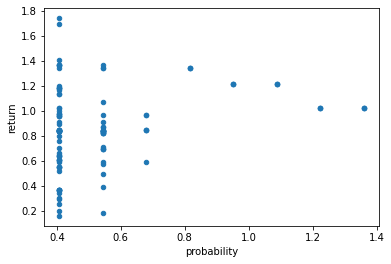

In [10]:
s = o.returns
#s[s.is_won].plot.scatter(x='probability', y='return')
#s.plot.scatter(x='rel_risk', y='return')
s[(s['rel_risk']>0)&(s['rel_risk']<3)&(s['return']>0)&(s['return']<2)].plot.scatter(x='probability', y='return')
#o.strikeDates[0].volRange

In [25]:
o.strikeDates[5].volRange[0].condors[4].valid_put_strikes

array([], dtype=float64)

In [7]:
s

,strike_date,return,rel_risk,probability,volatility,is_won,days_to_strike,iv,iv2,is_lost,vix
0,2022-07-01,0.5,0.02,0.408,0.791556,False,16.0,79.1556,79.1556,False,30.959999
1,2022-07-01,3.0,0.05,0.544,0.791556,False,21.0,79.1556,79.1556,True,30.959999
2,2022-07-01,NaN,NaN,0.680,0.791556,False,NaN,79.1556,79.1556,False,30.959999
3,2022-07-01,NaN,NaN,0.816,0.791556,False,NaN,79.1556,79.1556,False,30.959999
4,2022-07-01,NaN,NaN,0.952,0.791556,False,NaN,79.1556,79.1556,False,30.959999
...,...,...,...,...,...,...,...,...,...,...,...
1715,2022-08-26,NaN,NaN,0.816,0.955689,False,NaN,95.5689,0.0000,False,25.299999
1716,2022-08-26,NaN,NaN,0.952,0.955689,False,NaN,95.5689,0.0000,False,25.299999
1717,2022-08-26,NaN,NaN,1.088,0.955689,False,NaN,95.5689,0.0000,False,25.299999
1718,2022-08-26,NaN,NaN,1.224,0.955689,False,NaN,95.5689,0.0000,False,25.299999


In [67]:
linear_regressor = LinearRegression()
selection = s[(s['rel_risk']>0)&(s['rel_risk']<3)&(s['return']>0)&(s['return']<2)]
selection['sqr_rel_risk'] = np.log(selection['rel_risk'])
y = selection['return']
x = selection[['sqr_rel_risk', 'probability', 'iv', 'vix', 'days_to_strike']]
linear_regressor.fit(x, y)

C:\Users\ander\AppData\Local\Temp/ipykernel_23856/797529396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['sqr_rel_risk'] = np.log(selection['rel_risk'])


LinearRegression()

In [6]:
a = m.stock_data.options_analisys.find()

In [7]:
a.count()

C:\Users\ander\AppData\Local\Temp/ipykernel_24780/4086721465.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  a.count()


104

In [12]:
b = list(a)

In [14]:
c = pd.DataFrame.from_dict(b)

<AxesSubplot:>

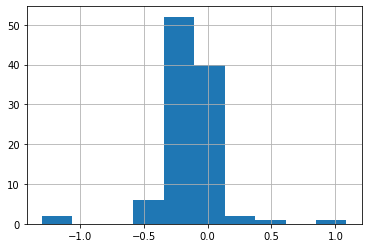

In [17]:
c['sqr_rel_risk'].hist()

In [24]:
len(c[c['sqr_rel_risk']<-0.4])

7

In [25]:
c[c['sqr_rel_risk']<-0.4]

,_id,y0,sqr_rel_risk,probability,iv,vix,days_to_strike,ticker,date
6,62cbc573359a988d2b5fcba9,-0.115957,-1.295159,-0.007448,-0.041271,0.000626,-0.004252,MGI,2022-07-11
16,62cbcb78023263c9811de5e0,-0.115957,-1.295159,-0.007448,-0.041271,0.000626,-0.004252,MGI,2022-07-11
21,62ce60e519fac682f04c2a5f,-0.116009,-0.448176,-0.859096,-0.017019,0.045977,0.011540,BE,2022-07-13
25,62ce661219fac682f04c2a67,0.147709,-0.410000,-0.487991,-0.008764,0.038965,0.002106,BILL,2022-07-13
30,62ce6ef519fac682f04c2a71,1.191560,-0.423037,-1.117476,-0.019179,-0.022803,0.018231,BP,2022-07-13
75,62d4ffe8df30c7b7901723f8,0.846724,-0.416298,-1.058993,-0.009666,0.015211,0.007624,FUBO,2022-07-18
87,62d65377f541f3925be189fc,0.648258,-0.567844,-1.229555,-0.015458,0.012389,0.009426,LAC,2022-07-19
